<a href="https://www.kaggle.com/code/eissaislam/face-mask-detection?scriptVersionId=126347745" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model

In [7]:
# Set the paths for the training, validation, and testing data
train_dir = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train'
validation_dir = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation'
test_dir = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test'

In [8]:
# Set the image size and batch size
IMG_SIZE = 150
BATCH_SIZE = 16

In [11]:
# Define the data generators for training, validation, and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [14]:
# Create the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [15]:
# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [17]:
# Define a checkpoint callback to save the model weights after each epoch
checkpoint_callback = ModelCheckpoint(
    'model_weights_latest.h5',
    monitor='val_accuracy',
    save_weights_only=True,
    save_best_only=False,
    mode='max',
    verbose=1
)

# Train the model with data augmentation and save the latest weights
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // BATCH_SIZE,
    callbacks=[checkpoint_callback]
)

# Save the final model
model.save('my_model_latest.h5')

Epoch 1/30
625/625 [==============================] - ETA: 0s - loss: 0.2221 - accuracy: 0.9151
Epoch 1: saving model to model_weights_latest.h5
625/625 [==============================] - 126s 202ms/step - loss: 0.2221 - accuracy: 0.9151 - val_loss: 0.2149 - val_accuracy: 0.9262
Epoch 2/30
625/625 [==============================] - ETA: 0s - loss: 0.1888 - accuracy: 0.9330
Epoch 2: saving model to model_weights_latest.h5
625/625 [==============================] - 78s 125ms/step - loss: 0.1888 - accuracy: 0.9330 - val_loss: 0.1015 - val_accuracy: 0.9675
Epoch 3/30
625/625 [==============================] - ETA: 0s - loss: 0.1794 - accuracy: 0.9381
Epoch 3: saving model to model_weights_latest.h5
625/625 [==============================] - 78s 125ms/step - loss: 0.1794 - accuracy: 0.9381 - val_loss: 0.1317 - val_accuracy: 0.9625
Epoch 4/30
625/625 [==============================] - ETA: 0s - loss: 0.1718 - accuracy: 0.9384
Epoch 4: saving model to model_weights_latest.h5
625/625 [========

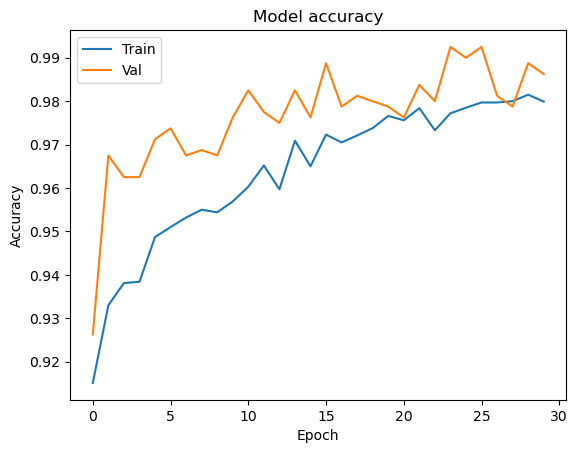

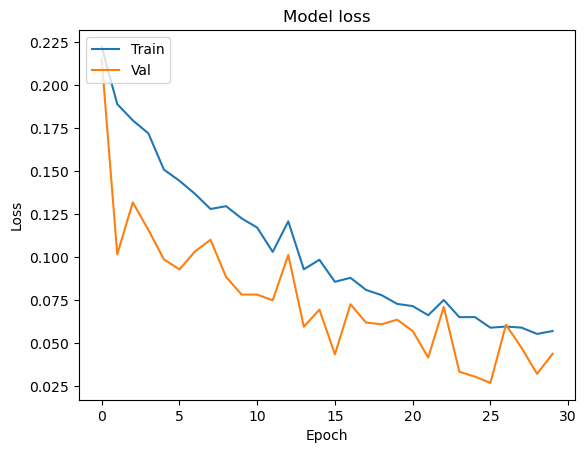

In [18]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [19]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('Test accuracy:', test_acc)

62/62 - 9s - loss: 0.0437 - accuracy: 0.9849 - 9s/epoch - 152ms/step
Test accuracy: 0.9848790168762207


In [20]:
# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.round(y_pred)

62/62 [==============================] - 2s 36ms/step


              precision    recall  f1-score   support

           0       0.50      0.50      0.50       483
           1       0.53      0.53      0.53       509

    accuracy                           0.52       992
   macro avg       0.51      0.51      0.51       992
weighted avg       0.52      0.52      0.52       992



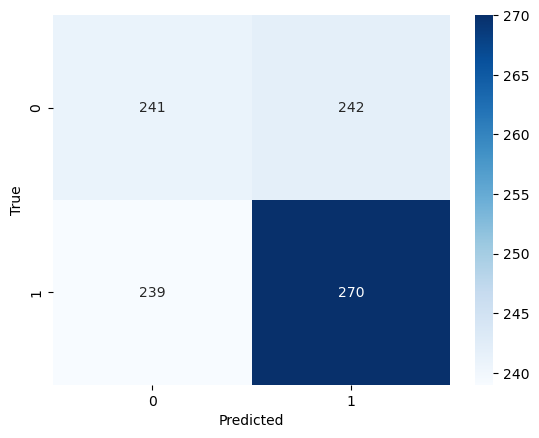

In [21]:
# Print the classification report and confusion matrix
print(classification_report(test_generator.classes, y_pred_classes))
conf_mat = confusion_matrix(test_generator.classes, y_pred_classes)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()